In [1]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
DATA_DIR = '/content/drive/MyDrive/Pose_yolov8/YoloV8_dataset.zip'

In [6]:
# Tạo thư mục đích
!mkdir -p /content/data

# Giải nén dataset.zip vào /content/data
!unzip -o "/content/drive/MyDrive/Pose_yolov8/YoloV8_dataset.zip" -d /content/data


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: /content/data/test/images/20250715_132043_0066_jpg.rf.fca9797be328fb80650063abda720e93.jpg  
 extracting: /content/data/test/images/20250715_132043_0075_jpg.rf.7d72830cf9cb31277df94eddf7edfe2d.jpg  
 extracting: /content/data/test/images/20250715_132043_0076_jpg.rf.8b78b9339d72469541ebeab28c02c886.jpg  
 extracting: /content/data/test/images/20250715_132043_0082_jpg.rf.15730bb284a494f2e69f76495a987efb.jpg  
 extracting: /content/data/test/images/20250715_132043_0092_jpg.rf.8bb08b4e0eeacaf1958cb61451fbaaa6.jpg  
 extracting: /content/data/test/images/20250715_132043_0112_jpg.rf.5e1de5ce2b2a0d596f86dcfdace9089c.jpg  
 extracting: /content/data/test/images/20250715_132316-online-video-cutter_com-_0010_jpg.rf.2e5241f92801200799dd10b132b514c8.jpg  
 extracting: /content/data/test/images/20250715_132316-online-video-cutter_com-_0011_jpg.rf.3b7dfcf2ceb1ba7572a6649082f25b7b.jpg  
 extracting: /content/data/test/images/202507

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Pose_yolov8/yolov8s.pt')
# 2. Train với early stopping và lưu mỗi epoch
model.train(
    data         = '/content/data/data.yaml',
    epochs       = 300,
    imgsz        = 640,
    batch        = 16,
    project      = '/content/drive/MyDrive/runs/train3',  # đường dẫn project
    name         = 'exp_corrected',                       # tên experiment
    save         = True,      # bật lưu checkpoints
    save_period  = 1,         # lưu sau mỗi 1 epoch
    patience     = 300,         # dừng nếu val-loss không cải thiện trong 5 epoch
    exist_ok     = True       # ghi đè exp cùng tên nếu đã tồn tại
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line

100%|██████████| 755k/755k [00:00<00:00, 143MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117983  ultralytics.nn.modules.head.Detect           [5, [128, 256, 512]]          
Model summary: 129 layers, 11,137,535 parameters, 11,137,519 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 369MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1394.0±452.1 MB/s, size: 82.1 KB)


train: Scanning /content/data/train/labels... 1762 images, 33 backgrounds, 224 corrupt: 100%|██████████| 1762/1762 [00:00<00:00, 2248.18it/s]

train: /content/data/train/images/-_-_-_jpg.rf.1b91ad5ad59f4ae51315704066e0ee8c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1422]
train: /content/data/train/images/0757414944_jpeg.rf.1cd8265f715b1e526eeb2dabb85ec877.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1558]
train: /content/data/train/images/10170009-5016_jpg.rf.032ab7acc8f94bd59f66de67431850df.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0296]
train: /content/data/train/images/10324306_jpg.rf.5a4db8bc74c6d9302c0e3e70d45f8107.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2364]
train: /content/data/train/images/1089_png.rf.28272dd0c7b1e8927ad6156dd5a7eb8b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0178]
train: /content/data/train/images/12480_png.rf.e281723aa1da4415b1d3bfe4d1ed2821.jpg: ignoring corrupt image/label: non-

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 853.9±497.6 MB/s, size: 81.3 KB)


val: Scanning /content/data/valid/labels... 503 images, 8 backgrounds, 85 corrupt: 100%|██████████| 503/503 [00:00<00:00, 1324.40it/s]

val: /content/data/valid/images/153-1ZF41A210548_jpg.rf.1077ffbdd5cee54a3ca1cf224aeb0f8a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0135]
val: /content/data/valid/images/17_png.rf.dc76f58c52ca2223e945e5ba8a082517.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2602]
val: /content/data/valid/images/2772_png.rf.10a32e72cd6b647bed12c8274a42a80c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2995]
val: /content/data/valid/images/2783_png.rf.a648003185fadcb5208e07364813ef48.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2833]
val: /content/data/valid/images/2957_png.rf.7fab315bba72900dc3d9c8c4db21c256.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2383]
val: /content/data/valid/images/3499_png.rf.4abf8c676c7cedc7e3617963fbbf7eb6.jpg: ignoring corrupt image/label: non-normalized or out of bou

Plotting labels to /content/drive/MyDrive/runs/train3/exp_corrected/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/runs/train3/exp_corrected
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      3.72G      1.124      1.985      1.289          4        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]


                   all        418        411      0.758      0.822      0.859      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      3.93G      1.166      1.237      1.269          8        640: 100%|██████████| 97/97 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.55it/s]


                   all        418        411      0.745      0.689       0.76      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      3.98G      1.248      1.233      1.324          8        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]

                   all        418        411       0.65      0.637      0.696      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.02G      1.227      1.205      1.312          4        640: 100%|██████████| 97/97 [00:32<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        418        411      0.777      0.673       0.79      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.06G      1.223      1.164      1.321          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.45it/s]

                   all        418        411      0.819      0.774      0.844      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.08G      1.159      1.061      1.273          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        418        411      0.779      0.754       0.78      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.13G      1.114       1.01      1.244          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        418        411      0.846      0.875      0.912      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.17G      1.121     0.9795      1.233          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]

                   all        418        411      0.886      0.877      0.937      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300       4.2G      1.101     0.9408      1.236          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.24it/s]

                   all        418        411      0.856      0.765      0.868      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.22G      1.085     0.9194      1.219          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]

                   all        418        411      0.869      0.885      0.935      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.27G      1.051     0.8837      1.199          7        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]

                   all        418        411      0.878      0.914      0.946      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      4.31G      1.019     0.8526      1.187          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        418        411      0.897       0.89      0.943       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      4.35G      1.028     0.8487      1.193          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]

                   all        418        411      0.894      0.921      0.953      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      4.37G     0.9785     0.8263      1.168          5        640: 100%|██████████| 97/97 [00:32<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]

                   all        418        411      0.872      0.866      0.936      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      4.42G     0.9984     0.7962      1.169          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]

                   all        418        411       0.89      0.931      0.962      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.46G     0.9805     0.7979      1.175          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]

                   all        418        411      0.929      0.915      0.951      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.49G     0.9974      0.781      1.185          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        418        411      0.914       0.88      0.951      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      4.51G     0.9743     0.7823       1.17          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]

                   all        418        411      0.906      0.908       0.95      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300       4.6G     0.9314     0.7186      1.146          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        418        411        0.9      0.931      0.954      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.67G     0.9523      0.746      1.168          4        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.55it/s]

                   all        418        411      0.883      0.862      0.917      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300       4.7G     0.9459     0.7245      1.148          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.59it/s]

                   all        418        411      0.927      0.934      0.967      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.76G     0.9247     0.7112      1.138          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        418        411      0.925       0.94      0.963      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.84G     0.9156     0.7033      1.141          2        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]

                   all        418        411      0.911       0.95      0.969      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      4.91G     0.9052     0.7089      1.143          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        418        411      0.917      0.904       0.96      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      4.95G     0.8946     0.6746      1.136          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        418        411      0.921      0.935      0.966      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      5.04G     0.8994     0.6859      1.131          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        418        411      0.915       0.95      0.966      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      5.12G     0.8804      0.697      1.122          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.25it/s]

                   all        418        411      0.939      0.945      0.962      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      5.16G     0.8966     0.6974       1.13          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]

                   all        418        411      0.915      0.931      0.957      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      5.23G     0.8704     0.6756      1.119          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

                   all        418        411      0.911      0.942      0.946      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      5.28G     0.8566     0.6579      1.105          2        640: 100%|██████████| 97/97 [00:32<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.27it/s]

                   all        418        411       0.92        0.9      0.956      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      5.37G     0.8586     0.6602      1.117          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]

                   all        418        411      0.873       0.91      0.932      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      5.44G     0.8522     0.6548      1.114          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]

                   all        418        411      0.934      0.939      0.969      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300       5.5G     0.8722     0.6303      1.121          8        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.52it/s]

                   all        418        411      0.921      0.951      0.969      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      5.56G     0.8578     0.6349      1.119          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.32it/s]

                   all        418        411      0.934      0.939      0.975      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      5.64G     0.8561     0.6227      1.109          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        418        411       0.93      0.939      0.964      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      5.68G     0.8637       0.64      1.113          4        640: 100%|██████████| 97/97 [00:32<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        418        411      0.928      0.954      0.974      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      5.75G     0.8231     0.6102      1.101          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]

                   all        418        411      0.927      0.948      0.966      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300       5.8G     0.8218     0.5976       1.09          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        418        411      0.925      0.921      0.961       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      5.89G     0.8269      0.606      1.094          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]

                   all        418        411      0.916      0.943      0.967      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      5.96G     0.8383     0.6124      1.097          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]

                   all        418        411      0.957      0.941       0.97       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      5.99G     0.8079     0.6012      1.079          8        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]

                   all        418        411      0.954      0.924      0.972      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      6.05G     0.7916     0.5668      1.069          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]

                   all        418        411      0.952      0.895      0.963      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      6.17G     0.7919     0.5837      1.084          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]

                   all        418        411      0.921      0.946      0.969      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300       6.2G     0.7989     0.5797      1.083          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        418        411      0.935      0.957      0.965      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      6.27G     0.7942     0.5908      1.083          6        640: 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.32it/s]

                   all        418        411      0.926      0.929      0.966      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      6.29G     0.7695     0.5709      1.078          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]

                   all        418        411      0.971      0.938      0.975      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      6.41G     0.7713     0.5679      1.068          6        640: 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        418        411       0.94      0.933      0.972      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      6.45G      0.768     0.5671      1.058          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]

                   all        418        411      0.937      0.944      0.971        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      6.52G     0.7823     0.5683      1.076          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]

                   all        418        411      0.906      0.937      0.964        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      6.57G     0.7713     0.5658      1.075          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        418        411      0.932      0.965      0.967      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      6.69G     0.7591     0.5505      1.071          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]

                   all        418        411      0.945      0.944      0.972      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      6.73G     0.7592     0.5547      1.065          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]

                   all        418        411      0.945       0.95      0.973      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      6.76G     0.7597     0.5519      1.061          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.28it/s]

                   all        418        411      0.924      0.935      0.968        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      6.85G     0.7488     0.5299      1.063          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        418        411      0.955      0.939      0.978      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      6.94G     0.7501      0.531      1.056          6        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]

                   all        418        411      0.956      0.934      0.969      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      6.97G     0.7686      0.551      1.071          7        640: 100%|██████████| 97/97 [00:32<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]

                   all        418        411      0.943      0.941      0.971      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      7.04G     0.7508     0.5507      1.051          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        418        411      0.936      0.936      0.963      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300       7.1G     0.7318     0.5083      1.055          5        640: 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]

                   all        418        411      0.933      0.951      0.973      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      7.21G     0.7401     0.5304      1.056          5        640: 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]

                   all        418        411      0.938      0.949      0.974       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      7.25G     0.7463     0.5396      1.059          5        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.936       0.96      0.976      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      7.29G     0.7406     0.5223      1.052          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.61it/s]

                   all        418        411      0.959      0.959      0.973      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      7.38G     0.7365     0.5416      1.055          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]

                   all        418        411      0.941      0.946      0.968      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      4.07G     0.7363     0.5303      1.057          6        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]

                   all        418        411      0.952      0.954      0.976      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      4.07G     0.7298     0.5217      1.056          4        640: 100%|██████████| 97/97 [00:36<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]

                   all        418        411      0.927      0.961      0.974      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      4.07G     0.7137     0.5078      1.034          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]

                   all        418        411      0.958      0.931      0.973      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      4.07G     0.7452     0.5337      1.054          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        418        411      0.931      0.957      0.974      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      4.07G     0.7512     0.5126      1.055          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        418        411      0.949      0.952       0.98      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      4.07G      0.721     0.5183      1.041          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]

                   all        418        411      0.932      0.939      0.975      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      4.09G     0.7194     0.5091       1.04          2        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]

                   all        418        411      0.957       0.95      0.973      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      4.11G     0.7111     0.4892      1.035          4        640: 100%|██████████| 97/97 [00:36<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]

                   all        418        411      0.931      0.973      0.974      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      4.16G      0.715      0.526      1.042          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.75it/s]

                   all        418        411       0.95      0.954      0.973      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300       4.2G     0.7296     0.5376      1.064          2        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.98it/s]

                   all        418        411      0.954      0.951      0.974      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      4.24G      0.719     0.5224      1.048          3        640: 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        418        411      0.952      0.943      0.977      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.26G     0.7228      0.517      1.042          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]

                   all        418        411      0.955      0.949      0.974      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.31G     0.7045     0.4906      1.033          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

                   all        418        411      0.963      0.933      0.975      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      4.35G     0.7128     0.4904      1.035          4        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        418        411       0.95       0.98      0.975      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      4.38G     0.7082     0.4909      1.033          4        640: 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]

                   all        418        411      0.945      0.961      0.979      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300       4.4G     0.6792     0.4912      1.022          5        640: 100%|██████████| 97/97 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        418        411      0.919      0.945      0.968      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      4.52G     0.6949     0.5026      1.029          6        640: 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]

                   all        418        411      0.939      0.962      0.977      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      4.56G     0.6991     0.4859      1.035          7        640: 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.82it/s]

                   all        418        411      0.954      0.942      0.975      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      4.63G     0.6989     0.4883      1.035          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        418        411      0.952      0.964      0.977      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      4.68G     0.6887     0.4858      1.035          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]

                   all        418        411      0.949      0.982      0.981      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300       4.8G     0.6767     0.4788      1.022          6        640: 100%|██████████| 97/97 [00:36<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]

                   all        418        411      0.945      0.969      0.979      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      4.84G     0.6786     0.4849      1.019          7        640: 100%|██████████| 97/97 [00:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]

                   all        418        411      0.912      0.959      0.972      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      4.87G     0.6843     0.4815      1.028          6        640: 100%|██████████| 97/97 [00:38<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]

                   all        418        411      0.953      0.976      0.977      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      4.93G     0.6618     0.4643      1.011          8        640: 100%|██████████| 97/97 [00:39<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]

                   all        418        411      0.956      0.958       0.98      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      5.04G     0.6966      0.486      1.035          4        640: 100%|██████████| 97/97 [00:38<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]

                   all        418        411      0.951      0.977      0.983      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      5.08G     0.6742     0.4678      1.018          5        640: 100%|██████████| 97/97 [00:38<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.68it/s]

                   all        418        411      0.949      0.969      0.975      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      5.15G      0.686     0.4879      1.021          4        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.20it/s]

                   all        418        411      0.967      0.958       0.98      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      5.21G     0.6651     0.4628      1.015          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]

                   all        418        411      0.923       0.96      0.975      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      5.32G     0.6731     0.4659      1.023          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        418        411      0.925      0.964      0.972      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      5.36G     0.6752     0.4594      1.022          6        640: 100%|██████████| 97/97 [00:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.71it/s]

                   all        418        411      0.948      0.971      0.974      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      5.43G     0.6711     0.4596      1.018          8        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]


                   all        418        411      0.953      0.962      0.971      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      5.45G     0.6653     0.4556      1.016          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]

                   all        418        411      0.952      0.974      0.979      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      5.57G     0.6495     0.4378      1.007          4        640: 100%|██████████| 97/97 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]

                   all        418        411      0.955      0.965      0.978       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300       5.6G      0.652     0.4433      1.014          6        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.81it/s]

                   all        418        411      0.932       0.97      0.976      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      5.67G     0.6627     0.4637      1.004          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]

                   all        418        411      0.935      0.965       0.97       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      5.73G     0.6586     0.4503      1.006          6        640: 100%|██████████| 97/97 [00:38<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        418        411      0.963      0.948      0.976      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      5.81G     0.6428     0.4484          1          7        640: 100%|██████████| 97/97 [00:36<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]

                   all        418        411      0.962      0.978      0.978      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      5.85G     0.6443     0.4379      1.007          7        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]

                   all        418        411      0.959      0.966      0.979       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      5.92G     0.6498      0.452      1.008          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

                   all        418        411      0.932      0.957      0.964      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      5.97G     0.6585     0.4695      1.015          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]


                   all        418        411      0.955      0.975      0.974      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      6.09G     0.6419     0.4463      1.006          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        418        411      0.961      0.968      0.977      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      6.13G     0.6502     0.4696      1.002          2        640: 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]

                   all        418        411      0.966      0.955      0.982      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300       6.2G     0.6497     0.4467      1.008          3        640: 100%|██████████| 97/97 [00:31<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        418        411      0.968       0.94       0.98      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      6.25G     0.6368     0.4446       1.01          6        640: 100%|██████████| 97/97 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.29it/s]

                   all        418        411      0.949      0.963       0.98      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      6.34G     0.6166     0.4264     0.9935          6        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.32it/s]

                   all        418        411      0.952      0.971      0.981      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300       6.4G     0.6375     0.4472      1.003          4        640: 100%|██████████| 97/97 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.955      0.975      0.979      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      6.44G     0.6379     0.4399      1.003          4        640: 100%|██████████| 97/97 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]

                   all        418        411      0.955      0.976      0.981      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300       6.5G     0.6366     0.4514      1.003          6        640: 100%|██████████| 97/97 [00:31<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]

                   all        418        411      0.958      0.967      0.978      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      6.61G     0.6279     0.4378      1.008          6        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]

                   all        418        411      0.965      0.968      0.978      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      6.65G     0.6318     0.4279      1.002          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]

                   all        418        411      0.961      0.947      0.972      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      6.72G      0.618     0.4215     0.9835          8        640: 100%|██████████| 97/97 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.27it/s]

                   all        418        411      0.971      0.972       0.98      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      6.78G     0.6196     0.4248     0.9947          8        640: 100%|██████████| 97/97 [00:36<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.24it/s]

                   all        418        411      0.955      0.955      0.981       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      6.86G     0.6276     0.4369     0.9966          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]

                   all        418        411       0.96      0.954      0.975      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      6.93G      0.617     0.4298      0.992          6        640: 100%|██████████| 97/97 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        418        411      0.943      0.969      0.981      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      6.96G     0.6085     0.4273     0.9901          6        640: 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        418        411      0.955      0.966      0.984      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      7.02G     0.6288     0.4241      0.994          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.81it/s]

                   all        418        411      0.964      0.946      0.975      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      7.13G      0.629     0.4314     0.9992          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        418        411      0.954      0.961      0.978      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      7.17G     0.6126      0.428     0.9957          7        640: 100%|██████████| 97/97 [00:36<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        418        411      0.948      0.979      0.984      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      7.24G     0.6077     0.4172     0.9915          2        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]

                   all        418        411      0.952      0.952      0.973      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300       7.3G     0.6145     0.4254     0.9886          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]

                   all        418        411      0.945      0.975      0.979       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      7.38G     0.6153     0.4227     0.9909          3        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]


                   all        418        411      0.946      0.965      0.976       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      4.06G     0.6107     0.4281     0.9902          4        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]

                   all        418        411      0.964      0.959      0.979      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      4.06G     0.6034     0.4258     0.9864          5        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]

                   all        418        411      0.937      0.957      0.974      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      4.06G     0.6003     0.4263     0.9839          6        640: 100%|██████████| 97/97 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.29it/s]

                   all        418        411      0.955      0.957       0.98      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      4.06G     0.6072     0.4114     0.9865          5        640: 100%|██████████| 97/97 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.29it/s]

                   all        418        411      0.955      0.959      0.974      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      4.06G     0.5893     0.4096     0.9779          8        640: 100%|██████████| 97/97 [00:31<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.95it/s]

                   all        418        411      0.958      0.974      0.974      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      4.06G     0.6116      0.417     0.9889          6        640: 100%|██████████| 97/97 [00:31<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]

                   all        418        411      0.955      0.971      0.978      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      4.06G      0.614     0.4263     0.9912          4        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]

                   all        418        411      0.951      0.959      0.975      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      4.11G     0.5847     0.4031     0.9762          2        640: 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.67it/s]

                   all        418        411      0.935      0.965      0.978      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      4.14G     0.6021     0.4224     0.9908          3        640: 100%|██████████| 97/97 [00:38<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.89it/s]

                   all        418        411      0.933      0.969      0.975      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      4.18G     0.6106     0.4239      1.003          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        418        411      0.926      0.956      0.971      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300       4.2G     0.5986     0.4123     0.9831          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.91it/s]


                   all        418        411      0.943      0.947      0.971      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      4.25G     0.5878      0.404      0.973          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        418        411      0.955      0.976      0.979      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      4.29G     0.5767     0.4008     0.9776          4        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]

                   all        418        411      0.924      0.949       0.97      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      4.32G     0.5944      0.417     0.9921          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]

                   all        418        411      0.954       0.96       0.98      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      4.35G     0.5828     0.4016     0.9784          5        640: 100%|██████████| 97/97 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.98it/s]

                   all        418        411      0.955      0.969      0.983      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      4.46G      0.605      0.421     0.9867          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]

                   all        418        411      0.964      0.974      0.981      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300       4.5G     0.5945     0.4121     0.9822          4        640: 100%|██████████| 97/97 [00:32<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        418        411       0.96      0.967      0.978      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      4.57G     0.5766     0.3975     0.9794          8        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.97it/s]

                   all        418        411      0.954      0.962      0.981      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      4.59G     0.5821     0.4032     0.9808          7        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        418        411       0.96      0.972      0.982      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      4.71G     0.5843     0.3896     0.9789          4        640: 100%|██████████| 97/97 [00:45<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        418        411      0.961      0.976       0.98      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      4.74G     0.5764     0.3918     0.9743          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]

                   all        418        411      0.963      0.977      0.981      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      4.85G     0.5648     0.3768       0.96          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.34it/s]

                   all        418        411      0.949      0.975      0.978      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      4.87G     0.5755     0.3916     0.9728          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.964      0.968      0.977      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      4.99G     0.5672     0.3913     0.9686          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        418        411      0.956      0.971      0.978      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      5.02G     0.5729     0.3941     0.9723          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]

                   all        418        411       0.97      0.959      0.977      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      5.09G     0.5605     0.3852     0.9721          7        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]

                   all        418        411      0.961      0.969      0.983      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      5.15G     0.5828      0.401     0.9801          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.65it/s]

                   all        418        411      0.961      0.949      0.975       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      5.26G     0.5663     0.3905     0.9695          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]

                   all        418        411      0.964       0.96      0.978      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300       5.3G     0.5695       0.39     0.9755          7        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        418        411      0.953      0.947       0.98      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      5.34G     0.5643     0.3866     0.9722          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]

                   all        418        411      0.962       0.96      0.977      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      5.39G     0.5748     0.3949     0.9744          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]

                   all        418        411      0.963      0.962       0.98      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      5.51G     0.5707     0.3919     0.9762          7        640: 100%|██████████| 97/97 [00:35<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.27it/s]

                   all        418        411      0.959      0.971      0.982      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      5.54G     0.5518     0.3784     0.9639          6        640: 100%|██████████| 97/97 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.19it/s]

                   all        418        411      0.959      0.952      0.979      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      5.61G     0.5529     0.3636     0.9618          2        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        418        411      0.951      0.961       0.98      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      5.67G      0.556     0.3786     0.9646          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        418        411      0.962      0.966      0.982      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      5.79G     0.5643     0.3864     0.9683          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        418        411      0.971       0.96      0.982      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      5.82G     0.5515     0.3748     0.9597          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.24it/s]

                   all        418        411      0.969      0.978      0.985      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      5.86G     0.5621     0.3822     0.9745          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]

                   all        418        411      0.962      0.966      0.984      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      5.91G     0.5634     0.4218     0.9808          1        640: 100%|██████████| 97/97 [00:33<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        418        411      0.959      0.975      0.982      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      6.03G     0.5452     0.3717       0.96          7        640: 100%|██████████| 97/97 [00:36<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]

                   all        418        411      0.954      0.974      0.982      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      6.07G     0.5519     0.3732     0.9594          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]

                   all        418        411      0.959      0.969      0.983      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      6.14G     0.5629      0.393       0.97          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]

                   all        418        411      0.956      0.971      0.983      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      6.19G     0.5435     0.3678     0.9539          8        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        418        411      0.956      0.964      0.982      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      6.28G     0.5383     0.3715       0.96          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]

                   all        418        411      0.961      0.967      0.981      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      6.31G     0.5328     0.3698     0.9557          8        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]

                   all        418        411      0.957      0.954      0.978      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      6.41G     0.5484     0.3751     0.9638          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.25it/s]

                   all        418        411      0.955       0.96      0.982      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      6.44G     0.5487     0.3761      0.957          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.01it/s]

                   all        418        411      0.948       0.98      0.987      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      6.55G      0.539     0.3701     0.9598          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        418        411      0.955      0.964      0.983       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      6.59G     0.5472     0.3699     0.9607          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.24it/s]

                   all        418        411      0.967       0.96      0.984      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      6.66G     0.5353     0.3549     0.9487          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.96it/s]

                   all        418        411      0.957      0.966      0.985      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      6.71G     0.5353     0.3577     0.9519          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]

                   all        418        411      0.971      0.968      0.986      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      6.83G     0.5302     0.3613     0.9553          7        640: 100%|██████████| 97/97 [00:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.98it/s]

                   all        418        411      0.949      0.965      0.982      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      6.87G      0.558     0.3785     0.9632          2        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        418        411       0.95      0.971       0.98      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      6.94G     0.5486     0.3637     0.9609          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]

                   all        418        411      0.959      0.957      0.979      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      6.96G      0.525     0.3665     0.9528          7        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]

                   all        418        411      0.945      0.969      0.979      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      7.08G     0.5252     0.3598     0.9475          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]

                   all        418        411      0.963      0.965      0.984      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      7.11G     0.5288     0.3622     0.9473          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.85it/s]

                   all        418        411      0.956      0.974      0.983      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      7.18G     0.5331     0.3614     0.9576          8        640: 100%|██████████| 97/97 [00:33<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]

                   all        418        411      0.963      0.962      0.982      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      7.24G     0.5318     0.3686     0.9589          6        640: 100%|██████████| 97/97 [00:35<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        418        411       0.96      0.959      0.978      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      7.36G     0.5266     0.3536     0.9458          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]

                   all        418        411      0.954      0.967      0.982      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      7.39G     0.5376     0.3724     0.9545          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.50it/s]

                   all        418        411      0.952      0.963       0.98      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      4.07G     0.5271     0.3545     0.9561          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]

                   all        418        411      0.961      0.966      0.986      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      4.07G     0.5251     0.3586     0.9519          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        418        411      0.955      0.963      0.982      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      4.07G     0.5202     0.3506     0.9513          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.85it/s]


                   all        418        411      0.961      0.974      0.983      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      4.07G     0.5146     0.3444     0.9399          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]

                   all        418        411      0.964       0.98      0.986      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      4.07G       0.51       0.35     0.9438          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]

                   all        418        411      0.961      0.961      0.984      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      4.07G     0.5051     0.3435     0.9405          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]

                   all        418        411      0.951      0.981      0.985      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      4.08G     0.5134     0.3481     0.9513          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        418        411      0.969      0.973      0.987      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      4.12G     0.5191     0.3552     0.9491          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.27it/s]

                   all        418        411      0.975      0.975      0.986      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      4.16G     0.4976     0.3411     0.9382          6        640: 100%|██████████| 97/97 [00:36<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]

                   all        418        411       0.97       0.97      0.986       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      4.18G     0.5218     0.3495     0.9459          3        640: 100%|██████████| 97/97 [00:36<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

                   all        418        411      0.963      0.976      0.985      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      4.23G     0.5157     0.3428     0.9422          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]

                   all        418        411      0.957      0.956      0.982       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      4.26G     0.5149     0.3529     0.9476          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        418        411       0.95       0.97      0.983      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300       4.3G      0.509     0.3411     0.9414          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]

                   all        418        411      0.949      0.973      0.985      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      4.32G     0.5011     0.3357     0.9423          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        418        411      0.955      0.972      0.984      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      4.41G     0.5026     0.3477      0.945          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        418        411      0.946      0.962       0.98      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      4.44G     0.5056      0.334     0.9526          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]

                   all        418        411       0.95      0.978      0.986      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      4.51G     0.4958     0.3401     0.9378          7        640: 100%|██████████| 97/97 [00:35<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.24it/s]

                   all        418        411      0.955      0.977      0.985      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      4.57G     0.5052     0.3459     0.9422          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        418        411      0.956      0.986      0.986      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      4.68G     0.4973     0.3383     0.9397          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]

                   all        418        411      0.959      0.965      0.984      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      4.68G     0.5267     0.3475     0.9596         36        640:  48%|████▊     | 47/97 [00:17<00:23,  2.10it/s]

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/data/test/images/12478_png.rf.262c4e7c42d2d0fecc36c88973eecda0.jpg: 384x640 1 situp, 483.4ms
Speed: 12.5ms preprocess, 483.4ms inference, 25.2ms postprocess per image at shape (1, 3, 384, 640)


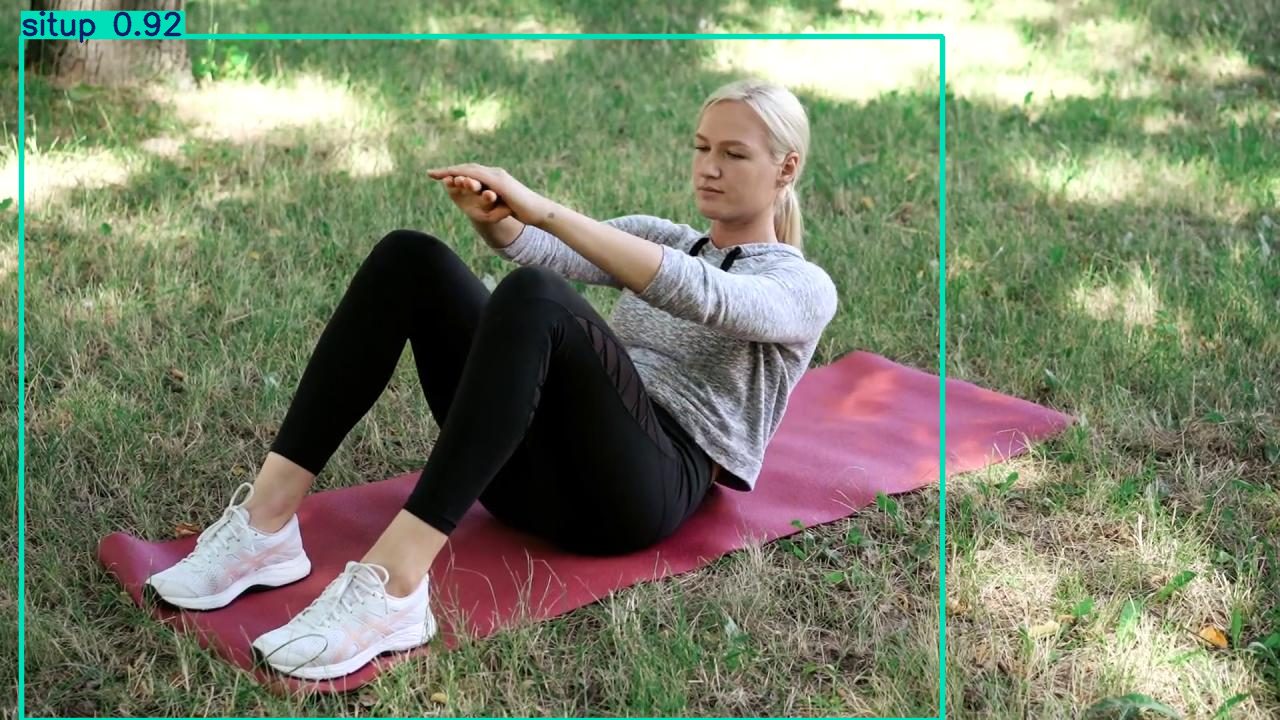

In [ ]:
from ultralytics import YOLO

# Load lại model tốt nhất
best_model = YOLO('/content/drive/MyDrive/runs/train3/exp_corrected/weights/best.pt')

# Dự đoán trên 1 ảnh
results = best_model.predict(source='/content/data/test/images/12478_png.rf.262c4e7c42d2d0fecc36c88973eecda0.jpg', imgsz=640, conf=0.5)

# Hiển thị kết quả
results[0].show()  # hoặc results[0].save(filename='output.jpg')

In [ ]:
best_model.val(
    data='/content/data/data.yaml',
    split='test',        # sử dụng tập test (nếu data.yaml có chỉ định test)
    batch=16,
    imgsz=640
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 69.7MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 37.9±3.1 MB/s, size: 79.6 KB)



val: Scanning /content/data/test/labels... 258 images, 11 backgrounds, 48 corrupt: 100%|██████████| 258/258 [00:00<00:00, 519.03it/s]

val: /content/data/test/images/20160830085131959_jpg.rf.24252fa1beee6ec53e325038fb586f77.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.186]
val: /content/data/test/images/2098_png.rf.1b0fdef3ff44e9fd3825b98c0ef9e1b7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0297]
val: /content/data/test/images/4_150716170434_1_jpg.rf.182addf6ccc7029978c48c5099142237.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0454]
val: /content/data/test/images/4_160606151322_2_jpg.rf.31d1152c26da8efc0691126ebcf8efd6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2457]
val: /content/data/test/images/4_160618115250_3_jpg.rf.99241a8b77309077d12fa8675f06fc8d.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1286]
val: /content/data/test/images/4_160618115558_1_jpg.rf.3baba4b1052686d6c0f40fce57264bf5.jpg: ignoring corr

val: New cache created: /content/data/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:33<00:00,  6.69s/it]


                   all        210        200      0.927      0.953      0.944       0.74
                 bicep         37         37      0.902          1      0.954       0.82
                 lunge         18         18      0.941      0.882      0.952      0.742
                 plank         49         49      0.957       0.98      0.962      0.835
                 situp         40         40      0.974      0.955      0.987      0.642
                 squat         56         56      0.862      0.946      0.867      0.658
Speed: 3.1ms preprocess, 428.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa824406a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
import cv2
from ultralytics import YOLO

# 1. Load model và video
model = YOLO('/content/drive/MyDrive/runs/train3/exp_corrected/weights/best.pt')
cap   = cv2.VideoCapture('/content/drive/MyDrive/Pose_yolov8/7570900295992398706.mp4')
w     = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h     = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps   = cap.get(cv2.CAP_PROP_FPS)

# 2. Chuẩn bị VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out    = cv2.VideoWriter('inference_output.mp4', fourcc, fps, (w,h))

# 3. Inference & draw box
while True:
    ret, frame = cap.read()
    if not ret: break

    results = model(frame)[0]
    for box in results.boxes:
        x1,y1,x2,y2 = map(int, box.xyxy[0])
        cls_id      = int(box.cls[0])
        conf        = float(box.conf[0])
        label       = f"{model.names[cls_id]} {conf:.2f}"

        # Vẽ bounding box + label
        cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(frame, label, (x1,y1-6),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    out.write(frame)

cap.release()
out.release()
print("Done. Xem video at inference_output.mp4")


Streaming output truncated to the last 5000 lines.
Speed: 2.7ms preprocess, 318.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 314.9ms
Speed: 8.3ms preprocess, 314.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 334.5ms
Speed: 2.9ms preprocess, 334.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 317.4ms
Speed: 4.3ms preprocess, 317.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 318.4ms
Speed: 4.9ms preprocess, 318.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 331.8ms
Speed: 5.3ms preprocess, 331.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 321.7ms
Speed: 2.7ms preprocess, 321.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bicep, 314.2ms
Speed: 3.0ms preprocess, 314.2ms inference, 0.9ms postproces

In [ ]:
best_ckpt = f"/content/drive/MyDrive/runs/train3/exp_corrected/weights/epoch{best_epoch}.pt"
model = YOLO(best_ckpt)  # load model checkpoint tốt nhất

In [ ]:
model.train(
    data       = '/content/data/data.yaml',
    epochs     = 300,            # tổng muốn train lên đến 300
    resume     = True,           # tiếp tục từ best_ckpt
    patience   = 20,             # dừng khi smoothed mAP50-95 không tăng trong 20 epoch
    lr0        = 5e-5,           # learning rate khởi điểm nhỏ hơn
    lrf        = 0.01,           # final LR = lr0 * lrf
    optimizer  = 'AdamW',        # hoặc 'SGD'
    project    = 'runs/train4',
    name       = 'exp_final',
    exist_ok   = True
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/runs/train3/exp_corrected/weights/epoch201.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_corrected, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2060.0±744.4 MB/s, size: 82.1 KB)


train: Scanning /content/data/train/labels... 1762 images, 33 backgrounds, 224 corrupt: 100%|██████████| 1762/1762 [00:00<00:00, 1972.82it/s]

train: /content/data/train/images/-_-_-_jpg.rf.1b91ad5ad59f4ae51315704066e0ee8c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1422]
train: /content/data/train/images/0757414944_jpeg.rf.1cd8265f715b1e526eeb2dabb85ec877.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1558]
train: /content/data/train/images/10170009-5016_jpg.rf.032ab7acc8f94bd59f66de67431850df.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0296]
train: /content/data/train/images/10324306_jpg.rf.5a4db8bc74c6d9302c0e3e70d45f8107.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2364]
train: /content/data/train/images/1089_png.rf.28272dd0c7b1e8927ad6156dd5a7eb8b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0178]
train: /content/data/train/images/12480_png.rf.e281723aa1da4415b1d3bfe4d1ed2821.jpg: ignoring corrupt image/label: non-

train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 559.0±118.7 MB/s, size: 81.3 KB)


val: Scanning /content/data/valid/labels.cache... 503 images, 8 backgrounds, 85 corrupt: 100%|██████████| 503/503 [00:00<?, ?it/s]

val: /content/data/valid/images/153-1ZF41A210548_jpg.rf.1077ffbdd5cee54a3ca1cf224aeb0f8a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0135]
val: /content/data/valid/images/17_png.rf.dc76f58c52ca2223e945e5ba8a082517.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2602]
val: /content/data/valid/images/2772_png.rf.10a32e72cd6b647bed12c8274a42a80c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2995]
val: /content/data/valid/images/2783_png.rf.a648003185fadcb5208e07364813ef48.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2833]
val: /content/data/valid/images/2957_png.rf.7fab315bba72900dc3d9c8c4db21c256.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2383]
val: /content/data/valid/images/3499_png.rf.4abf8c676c7cedc7e3617963fbbf7eb6.jpg: ignoring corrupt image/label: non-normalized or out of bou

Plotting labels to /content/drive/MyDrive/runs/train3/exp_corrected/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/runs/train3/exp_corrected/weights/epoch201.pt from epoch 203 to 300 total epochs
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/runs/train3/exp_corrected
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      3.76G     0.4867      0.332      0.936          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

                   all        418        411      0.947      0.973      0.984      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      3.94G     0.4906     0.3339     0.9351          8        640: 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]

                   all        418        411      0.965      0.948      0.984      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      3.98G     0.5029     0.3432     0.9424          8        640: 100%|██████████| 97/97 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]

                   all        418        411       0.96      0.972      0.985      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      3.98G     0.4967     0.3371     0.9376          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]

                   all        418        411      0.971      0.971      0.987      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      4.02G     0.5096     0.3385     0.9484          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]

                   all        418        411      0.962      0.969      0.982      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      4.02G      0.488     0.3283     0.9379          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]

                   all        418        411      0.963      0.963      0.982      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      4.05G      0.478     0.3169     0.9316          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]

                   all        418        411       0.96      0.952      0.981      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      4.05G     0.4928     0.3258     0.9296          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        418        411      0.958      0.957      0.981      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      4.09G      0.498      0.336     0.9377          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]

                   all        418        411       0.97      0.931      0.979      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      4.09G     0.4966     0.3295     0.9384          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]

                   all        418        411      0.963      0.935      0.975      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      4.09G     0.4881     0.3345     0.9365          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        418        411      0.971      0.922      0.977      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      4.12G     0.4867      0.332     0.9351          7        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]

                   all        418        411      0.963       0.95      0.981      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      4.12G     0.4875     0.3353     0.9347          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]

                   all        418        411      0.962      0.953      0.982      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      4.15G     0.4837      0.329     0.9297          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]

                   all        418        411      0.962      0.955      0.981      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      4.16G     0.4778     0.3225     0.9268          4        640: 100%|██████████| 97/97 [00:32<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]

                   all        418        411      0.961      0.954       0.98      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300       4.2G     0.4825     0.3327     0.9312          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]

                   all        418        411      0.954      0.973      0.984      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300       4.2G     0.4762      0.335     0.9327          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        418        411      0.962      0.951      0.981      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300       4.2G     0.4807     0.3315     0.9337          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]

                   all        418        411       0.96      0.953      0.984      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300       4.2G     0.4808     0.3233     0.9369          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]

                   all        418        411      0.957      0.956      0.983      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300       4.2G     0.4919       0.33      0.943          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.81it/s]

                   all        418        411      0.958      0.957      0.982      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300       4.2G     0.4822     0.3264     0.9319          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]

                   all        418        411      0.972      0.952      0.983      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300       4.2G     0.4861      0.325     0.9355          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]

                   all        418        411      0.963      0.958      0.981      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300       4.2G     0.4818      0.323     0.9391          2        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]

                   all        418        411      0.956      0.962       0.98      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300       4.2G     0.4876      0.337      0.939          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]

                   all        418        411      0.954      0.958       0.98      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300       4.2G     0.4691     0.3142     0.9351          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]

                   all        418        411      0.951      0.972       0.98      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300       4.2G     0.4701     0.3227     0.9261          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]

                   all        418        411      0.969      0.953      0.985      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300       4.2G     0.4718     0.3267      0.931          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]

                   all        418        411      0.937      0.982      0.984      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300       4.2G      0.474     0.3194      0.933          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.44it/s]

                   all        418        411      0.954      0.974      0.984      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300       4.2G     0.4566     0.3128     0.9236          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.951      0.976      0.981      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300       4.2G     0.4604      0.312     0.9259          2        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]

                   all        418        411      0.961      0.965      0.982       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300       4.2G     0.4622     0.3116     0.9229          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.29it/s]

                   all        418        411      0.954      0.977      0.982       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300       4.2G     0.4672     0.3131     0.9248          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]

                   all        418        411      0.964      0.974      0.985       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300       4.2G     0.4662     0.3098     0.9282          8        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.70it/s]

                   all        418        411       0.97      0.963      0.985      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300       4.2G     0.4676     0.3087     0.9284          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]

                   all        418        411      0.959      0.971      0.984      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300       4.2G      0.457     0.3051     0.9261          6        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]

                   all        418        411      0.958      0.971      0.983      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300       4.2G     0.4675     0.3194     0.9284          4        640: 100%|██████████| 97/97 [00:32<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]

                   all        418        411       0.97      0.966      0.985      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300       4.2G     0.4564     0.3084     0.9249          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        418        411      0.966       0.96      0.985      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300       4.2G     0.4485     0.3043     0.9196          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.971      0.961      0.985      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300       4.2G     0.4586     0.3121     0.9202          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        418        411      0.975      0.963      0.986      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300       4.2G     0.4597     0.3122     0.9201          4        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        418        411      0.968      0.969      0.986      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300       4.2G     0.4382     0.2973     0.9103          8        640: 100%|██████████| 97/97 [00:34<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]

                   all        418        411      0.962      0.968      0.984      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300       4.2G     0.4452     0.2958     0.9107          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]

                   all        418        411      0.964      0.961      0.986      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300       4.2G     0.4479     0.3101     0.9177          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.45it/s]

                   all        418        411      0.965      0.961      0.985      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300       4.2G     0.4544     0.3091     0.9181          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]

                   all        418        411      0.965      0.955      0.982      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300       4.2G     0.4388     0.3039     0.9153          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.97it/s]

                   all        418        411      0.961      0.966      0.983      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300       4.2G     0.4416     0.3011       0.92          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]

                   all        418        411      0.956      0.962      0.982      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300       4.2G     0.4347     0.2942     0.9148          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.58it/s]

                   all        418        411      0.953      0.968      0.983      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300       4.2G     0.4339     0.2915     0.9065          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]

                   all        418        411      0.957      0.965      0.984      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300       4.2G     0.4354     0.2975     0.9139          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]

                   all        418        411      0.964      0.971      0.985      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300       4.2G     0.4457     0.2963     0.9201          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]

                   all        418        411      0.958      0.976      0.986       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300       4.2G     0.4196     0.2869     0.9111          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.966      0.974      0.987      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300       4.2G     0.4361     0.2894     0.9157          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]

                   all        418        411      0.965      0.974      0.987      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300       4.2G     0.4322     0.2919     0.9136          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.47it/s]

                   all        418        411       0.96       0.97      0.983      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300       4.2G     0.4227     0.2829     0.9144          5        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]

                   all        418        411      0.972      0.973      0.983      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300       4.2G      0.427     0.2869     0.9107          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]

                   all        418        411      0.969      0.967      0.981      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300       4.2G     0.4392     0.2948     0.9152          7        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]

                   all        418        411      0.973      0.966       0.98      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300       4.2G     0.4364     0.2968     0.9118          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]

                   all        418        411      0.971      0.973      0.982      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300       4.2G     0.4332     0.2867     0.9167          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]

                   all        418        411       0.97      0.974      0.984      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300       4.2G     0.4334     0.2836     0.9164          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]

                   all        418        411      0.965      0.969      0.984      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300       4.2G     0.4338     0.2943     0.9208          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]

                   all        418        411      0.963      0.965      0.984      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300       4.2G     0.4283     0.2852     0.9117          3        640: 100%|██████████| 97/97 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]

                   all        418        411      0.972      0.958      0.984      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300       4.2G     0.4401     0.3045     0.9167          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]

                   all        418        411      0.952       0.97      0.982      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300       4.2G     0.4407     0.2972       0.92          6        640: 100%|██████████| 97/97 [00:34<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]

                   all        418        411      0.969      0.971      0.984      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300       4.2G     0.4239     0.2891     0.9144          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.09it/s]

                   all        418        411       0.96      0.969      0.983      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300       4.2G     0.4152     0.2797     0.9002          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]

                   all        418        411      0.952      0.972      0.982      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300       4.2G     0.4271       0.29     0.9077          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]

                   all        418        411      0.968       0.96      0.982      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300       4.2G     0.4359     0.2856     0.9157          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.952      0.977      0.984      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300       4.2G     0.4351     0.2924     0.9118          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.34it/s]

                   all        418        411      0.974      0.951      0.983      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300       4.2G     0.4343     0.2872     0.9101          2        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]

                   all        418        411       0.97      0.957      0.982      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300       4.2G     0.4144     0.2801     0.9024          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.21it/s]

                   all        418        411      0.973       0.96      0.982      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300       4.2G     0.4243     0.2885     0.9136          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.44it/s]

                   all        418        411      0.959      0.981      0.984      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300       4.2G     0.4176     0.2919     0.9086          2        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]

                   all        418        411      0.959      0.984      0.984      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300       4.2G     0.4311     0.2933     0.9275          3        640: 100%|██████████| 97/97 [00:32<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]

                   all        418        411      0.954      0.977      0.982      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300       4.2G     0.4267      0.288     0.9138          3        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.67it/s]

                   all        418        411      0.958      0.976      0.983      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300       4.2G      0.421     0.2817     0.9079          5        640: 100%|██████████| 97/97 [00:35<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        418        411      0.962      0.976      0.985      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300       4.2G     0.4145     0.2712      0.902          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]

                   all        418        411       0.96      0.978      0.985       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300       4.2G     0.4148     0.2783     0.9058          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]

                   all        418        411      0.963      0.975      0.986       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300       4.2G     0.4069     0.2786      0.905          5        640: 100%|██████████| 97/97 [00:34<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]

                   all        418        411      0.968      0.975      0.986      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300       4.2G     0.4128      0.283     0.9012          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]

                   all        418        411      0.969      0.975      0.986       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300       4.2G     0.4149     0.2792     0.9106          7        640: 100%|██████████| 97/97 [00:32<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.56it/s]

                   all        418        411      0.968      0.974      0.985      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300       4.2G     0.4141     0.2719     0.9073          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]

                   all        418        411      0.968      0.973      0.985      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300       4.2G     0.4157     0.2831     0.9143          3        640: 100%|██████████| 97/97 [00:34<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.61it/s]

                   all        418        411      0.965      0.972      0.985       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300       4.2G     0.4025     0.2664     0.8999          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]

                   all        418        411      0.962       0.97      0.983      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300       4.2G     0.4103     0.2772     0.9041          7        640: 100%|██████████| 97/97 [00:34<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.57it/s]

                   all        418        411      0.968      0.969      0.984      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300       4.2G     0.4134     0.2787      0.911          6        640: 100%|██████████| 97/97 [00:33<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]

                   all        418        411      0.964      0.969      0.984      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300       4.2G     0.3953     0.2664     0.8992          8        640: 100%|██████████| 97/97 [00:35<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]

                   all        418        411      0.964       0.97      0.983      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300       4.2G     0.4158     0.2783     0.9098          4        640: 100%|██████████| 97/97 [00:33<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]


                   all        418        411      0.964      0.966      0.984      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300       4.2G     0.4014     0.2643     0.9025          5        640: 100%|██████████| 97/97 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.66it/s]

                   all        418        411      0.971      0.966      0.985      0.775


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300       4.2G     0.3174     0.1874     0.8239          2        640: 100%|██████████| 97/97 [00:36<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]

                   all        418        411      0.958       0.97      0.985      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300       4.2G     0.2996     0.1749     0.8211          2        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        418        411      0.969      0.955      0.984      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300       4.2G     0.3008     0.1685     0.8307          2        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]

                   all        418        411      0.963      0.964      0.982      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300       4.2G     0.2916     0.1693     0.8213          2        640: 100%|██████████| 97/97 [00:31<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]

                   all        418        411      0.963      0.961      0.982      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300       4.2G     0.2948     0.1687     0.8213          2        640: 100%|██████████| 97/97 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.68it/s]

                   all        418        411      0.963       0.96      0.982      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300       4.2G     0.2888     0.1671     0.8224          2        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]

                   all        418        411      0.961       0.96      0.982      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300       4.2G      0.289     0.1642     0.8217          2        640: 100%|██████████| 97/97 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.75it/s]

                   all        418        411      0.964      0.958      0.981      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300       4.2G     0.2804     0.1631     0.8173          2        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        418        411       0.96      0.953      0.981      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300       4.2G     0.2872     0.1644      0.817          2        640: 100%|██████████| 97/97 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.72it/s]

                   all        418        411      0.959      0.956      0.982      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300       4.2G     0.2856     0.1653     0.8184          1        640: 100%|██████████| 97/97 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.74it/s]

                   all        418        411      0.958      0.956      0.982      0.756



98 epochs completed in 1.046 hours.
Optimizer stripped from /content/drive/MyDrive/runs/train3/exp_corrected/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/runs/train3/exp_corrected/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/runs/train3/exp_corrected/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]


                   all        418        411      0.964      0.969      0.984      0.775
                 bicep         70         70      0.977          1      0.985      0.885
                 lunge         44         44          1      0.972      0.994      0.764
                 plank        113        113      0.958      0.998      0.984      0.836
                 situp         71         72      0.957      0.919      0.986      0.667
                 squat        112        112       0.93      0.955      0.969      0.724
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/drive/MyDrive/runs/train3/exp_corrected


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1f626cc050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [7]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/runs/train3/exp_corrected/weights/best.pt")
results = model.val(data="/content/data/data.yaml", split="train")


Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 31.6±10.0 MB/s, size: 82.7 KB)



val: Scanning /content/data/train/labels... 1762 images, 33 backgrounds, 224 corrupt: 100%|██████████| 1762/1762 [00:04<00:00, 401.95it/s]

val: /content/data/train/images/-_-_-_jpg.rf.1b91ad5ad59f4ae51315704066e0ee8c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1422]
val: /content/data/train/images/0757414944_jpeg.rf.1cd8265f715b1e526eeb2dabb85ec877.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1558]
val: /content/data/train/images/10170009-5016_jpg.rf.032ab7acc8f94bd59f66de67431850df.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0296]
val: /content/data/train/images/10324306_jpg.rf.5a4db8bc74c6d9302c0e3e70d45f8107.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2364]
val: /content/data/train/images/1089_png.rf.28272dd0c7b1e8927ad6156dd5a7eb8b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0178]
val: /content/data/train/images/12480_png.rf.e281723aa1da4415b1d3bfe4d1ed2821.jpg: ignoring corrupt image/label: non-normalized o


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:17<00:00,  5.48it/s]


                   all       1538       1508      0.994      0.997      0.995       0.95
                 bicep        399        400      0.995      0.998      0.994       0.96
                 lunge        251        251      0.989          1      0.995      0.969
                 plank        407        407      0.998          1      0.995      0.951
                 situp        227        229      0.995      0.987      0.995      0.899
                 squat        221        221      0.993          1      0.995      0.972
Speed: 0.5ms preprocess, 4.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2


In [11]:
from ultralytics import YOLO

# Load best model
model = YOLO("/content/drive/MyDrive/runs/train3/exp_corrected/weights/best.pt")

# Evaluate
results = model.val(data="/content/data/data.yaml", split="val", save_json=True, plots=True)


Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1828.7±378.9 MB/s, size: 76.0 KB)


val: Scanning /content/data/valid/labels.cache... 503 images, 8 backgrounds, 85 corrupt: 100%|██████████| 503/503 [00:00<?, ?it/s]

val: /content/data/valid/images/153-1ZF41A210548_jpg.rf.1077ffbdd5cee54a3ca1cf224aeb0f8a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0135]
val: /content/data/valid/images/17_png.rf.dc76f58c52ca2223e945e5ba8a082517.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2602]
val: /content/data/valid/images/2772_png.rf.10a32e72cd6b647bed12c8274a42a80c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2995]
val: /content/data/valid/images/2783_png.rf.a648003185fadcb5208e07364813ef48.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2833]
val: /content/data/valid/images/2957_png.rf.7fab315bba72900dc3d9c8c4db21c256.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2383]
val: /content/data/valid/images/3499_png.rf.4abf8c676c7cedc7e3617963fbbf7eb6.jpg: ignoring corrupt image/label: non-normalized or out of bou


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.89it/s]


                   all        418        411      0.963      0.967      0.982      0.775
                 bicep         70         70      0.977          1      0.985      0.885
                 lunge         44         44          1      0.972      0.994      0.764
                 plank        113        113      0.958      0.998      0.985      0.836
                 situp         71         72      0.957      0.919      0.986      0.665
                 squat        112        112      0.921      0.946      0.963      0.726
Speed: 0.8ms preprocess, 5.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Saving runs/detect/val3/predictions.json...
Results saved to runs/detect/val3
